# EE915: Week-7 - Project-7 - LDA Diabetes Prediction
**Name**: Venkateswar Reddy Melachervu </br>
**Roll No.**: 23156022 </br>
**Email**: vmela23@iitk.ac.in </br>
**Dataset**: Diabetes </br>
**Professor**: Prof. Aditya K. Jagganatham </br>
**TAs**: Meesam and Priyanka </br>

This project uses LDA technique to perform clustering on a given dataset.

&copy; Venkateswar Reddy Melachervu 2024. All rights reserved.


In [ ]:
%pip install seaborn
%pip install wordcloud
%pip install scikit-learn
%pip install matplotlib
%pip install ffmpeg-python

In [24]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, f1_score, average_precision_score
from sklearn.preprocessing import StandardScaler

In [6]:
# Define roll number, name, email and  load the diabetes dataset
roll_number = "23156022" 
name = "Venkateswar Reddy Melachervu"
email = "vmela23@iitk.ac.in"

DiabetesData = pd.read_csv('Diabetes.csv')

X = DiabetesData.iloc[:, [0, 1]].values
Y = DiabetesData.iloc[:, 2].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

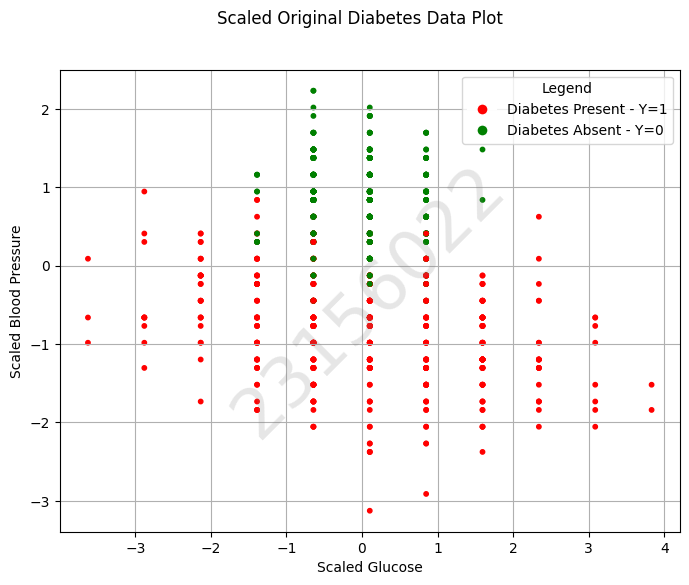

In [37]:
# Plot the original scaled  data  - scatter plot
plt.figure(figsize=(8, 6))

# Custom color map: Red for class 1, Green for class 0
colors = np.where(Y == 1, 'red', 'green')

# Plot training data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors, s=10)
plt.suptitle('Scaled Original Diabetes Data Plot')
plt.xlabel('Scaled Glucose')
plt.ylabel('Scaled Blood Pressure')
plt.grid(True,which='both')
plt.axis('tight')

# Add centered diagonal watermark with roll number
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2, 
         rotation=45, ha='center', va='center', transform=plt.gca().transAxes)

# Add legend with custom colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Diabetes Present - Y=1'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Diabetes Absent - Y=0')]
plt.legend(handles=legend_elements, title="Legend", loc="upper right")

plt.show()

In [29]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=5)
print("Training data shape/size:", X_train.shape)
print("Training label shape/size:", Y_train.shape)
print("Test data shape/size:", X_test.shape)
print("Test label shape/size:", Y_test.shape)

Training data shape/size: (796, 2)
Training label shape/size: (796,)
Test data shape/size: (199, 2)
Test label shape/size: (199,)


In [30]:
# Linear Discriminant Analysis classifier fitting
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
Y_pred = lda.predict(X_scaled)
lda_score = accuracy_score(Y_test,lda.predict(X_test))
print(f'Accuracy score of LDA classifier is: {100 * lda_score:.6f}%\n')

Accuracy score of LDA classifier is: 94.472362%



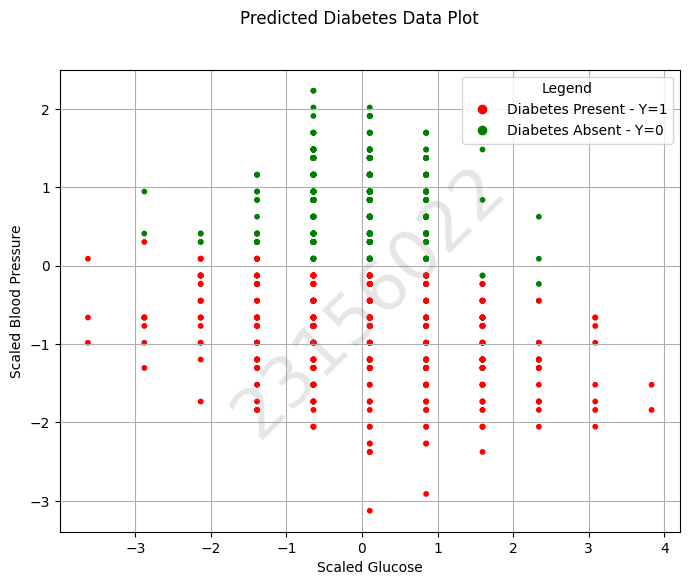

In [36]:
# Plot predicted values scatter plot
plt.figure(figsize=(8, 6))

# Custom color map: Red for predicted class 1, Green for predicted class 0
colors_pred = np.where(Y_pred == 1, 'red', 'green')

# Create scatter plot with colors matching the legend
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors_pred, s=10, marker='o')

# Title and labels
plt.suptitle('Predicted Diabetes Data Plot')
plt.xlabel('Scaled Glucose')
plt.ylabel('Scaled Blood Pressure')
plt.grid(True, which='both')
plt.axis('tight')

# Add centered diagonal watermark with roll number
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2, 
         rotation=45, ha='center', va='center', transform=plt.gca().transAxes)

# Add legend with custom colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Diabetes Present - Y=1'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Diabetes Absent - Y=0')]
plt.legend(handles=legend_elements, title="Legend", loc="upper right")

plt.show()


C:\Users\vmela\AppData\Local\Temp\ipykernel_7344\2474051709.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors_pred, edgecolor='k', s=20, cmap='coolwarm')


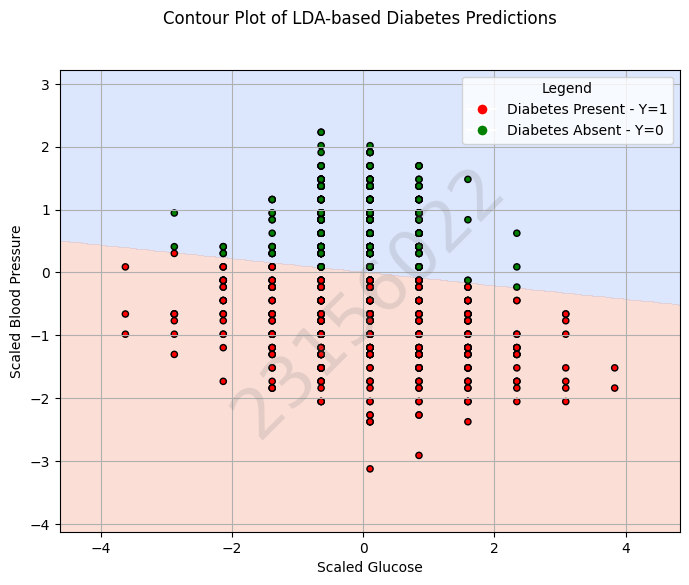

In [46]:
# Contour plot of the predicted values

# Create a grid for the contour plot
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the probability of each point in the grid
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour
plt.figure(figsize=(8, 6))

# Plot contours
contour = plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm', levels=np.linspace(0, 1, 3))

# Plot data points
colors_pred = np.where(Y_pred == 1, 'red', 'green')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors_pred, edgecolor='k', s=20, cmap='coolwarm')

# Title and labels
plt.suptitle('Contour Plot of LDA-based Diabetes Predictions')
plt.xlabel('Scaled Glucose')
plt.ylabel('Scaled Blood Pressure')
plt.grid(True, which='both')
plt.axis('tight')

# Add centered diagonal watermark with roll number
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2, 
         rotation=45, ha='center', va='center', transform=plt.gca().transAxes)

# Add legend with custom colors
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Diabetes Present - Y=1'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Diabetes Absent - Y=0')]
plt.legend(handles=legend_elements, title="Legend", loc="upper right")

plt.show()


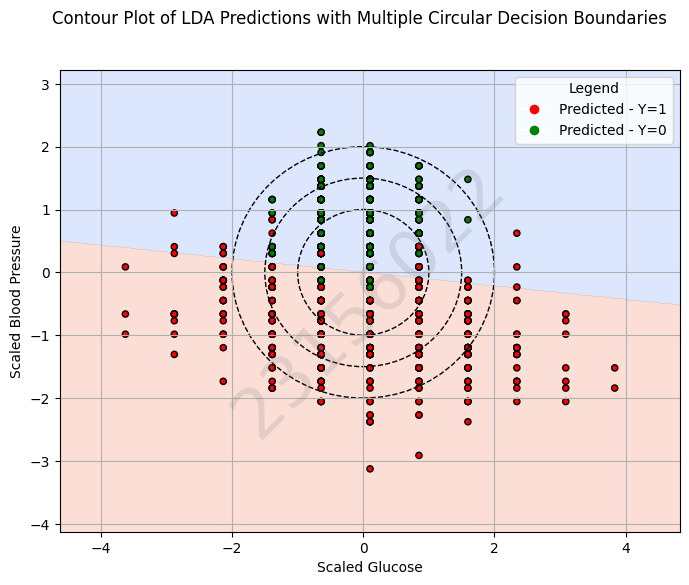

In [49]:
# Contour plot of the predicted values with circular decision boundary

# Create a grid for the contour plot
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class labels for each point in the grid
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour
plt.figure(figsize=(8, 6))

# Plot contours with custom colors
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm, levels=np.linspace(0, 1, 3))

# Plot data points
colors_pred = np.where(Y == 1, 'red', 'green')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors_pred, edgecolor='k', s=20)

# Add multiple circular decision boundaries
circle1 = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
circle2 = plt.Circle((0, 0), 1.5, color='black', fill=False, linestyle='--')
circle3 = plt.Circle((0, 0), 2, color='black', fill=False, linestyle='--')
plt.gca().add_artist(circle1)
plt.gca().add_artist(circle2)
plt.gca().add_artist(circle3)

# Title and labels
plt.suptitle('Contour Plot of LDA Predictions with Multiple Circular Decision Boundaries')
plt.xlabel('Scaled Glucose')
plt.ylabel('Scaled Blood Pressure')
plt.grid(True, which='both')
plt.axis('tight')

# Add centered diagonal watermark with roll number
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2, 
         rotation=45, ha='center', va='center', transform=plt.gca().transAxes)

# Add legend with custom colors
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Predicted - Y=1'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Predicted - Y=0')]
plt.legend(handles=legend_elements, title="Legend", loc="upper right")

plt.show()

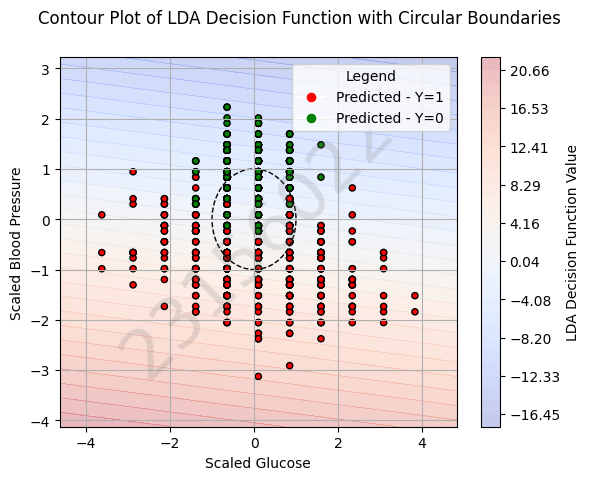

In [51]:
# Plot contours representing decision function levels
# Create a grid for the contour plot
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Calculate LDA decision boundary
lda_decision = lda.decision_function(np.c_[xx.ravel(), yy.ravel()])
lda_decision = lda_decision.reshape(xx.shape)

contour = plt.contourf(xx, yy, lda_decision, alpha=0.3, cmap=plt.cm.coolwarm, levels=np.linspace(lda_decision.min(), lda_decision.max(), 30))
plt.colorbar(contour, label='LDA Decision Function Value')

# Plot data points
colors_pred = np.where(Y == 1, 'red', 'green')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors_pred, edgecolor='k', s=20)

# Add circular decision boundaries
# Assuming circular boundaries are to be drawn based on a simple threshold or specific radii
radius = 1.0  # Adjust this radius as needed
circle1 = plt.Circle((0, 0), radius, color='black', fill=False, linestyle='--')
plt.gca().add_artist(circle1)

# Title and labels
plt.suptitle('Contour Plot of LDA Decision Function with Circular Boundaries')
plt.xlabel('Scaled Glucose')
plt.ylabel('Scaled Blood Pressure')
plt.grid(True, which='both')
plt.axis('tight')

# Add centered diagonal watermark with roll number
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2, 
         rotation=45, ha='center', va='center', transform=plt.gca().transAxes)

# Add legend with custom colors
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Predicted - Y=1'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Predicted - Y=0')]
plt.legend(handles=legend_elements, title="Legend", loc="upper right")

plt.show()

In [ ]:
!jupyter nbconvert --to pdf Proj_07_LDA_Diabetes_Dataset_Full.ipynb
